In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import basicImgProcess as bip

---basic image process tools are imported in---


## 课上的分割方法

In [2]:
img=cv2.imread("img1.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)

(309, 482)


In [3]:
img_seg=bip.seg(img,bip.BINSEG)

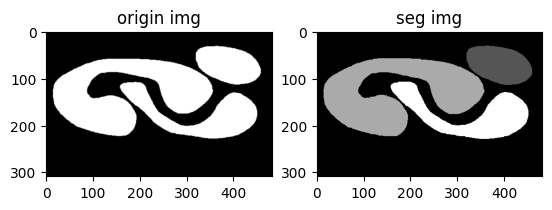

In [4]:
plt.subplot(1,2,1)
plt.title("origin img")
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title("seg img")
plt.imshow(img_seg,cmap='gray')

plt.show()

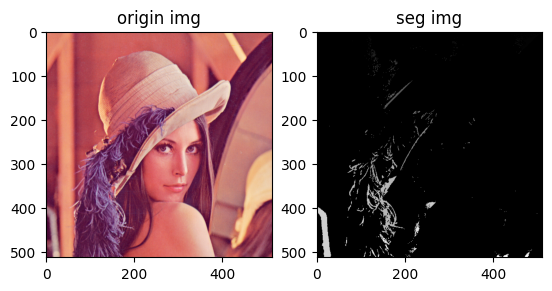

In [5]:
img=cv2.imread("lena.png")
b,g,r=cv2.split(img)
img=cv2.merge([r,g,b])

img_seg=bip.seg(img,bip.CLASSICSEG)

plt.subplot(1,2,1)
plt.title("origin img")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("seg img")
plt.imshow(img_seg,cmap='gray')

plt.show()

注：这里换了张复杂图像，导致分割块数很多，有约1000种不同亮度，效果不好。如果改进 function: isConnected 算法，也是可以分割复杂彩色图像的。

## 我的分割方法
用大一点的图片会超过递归上限（大概3000次），所以用了32*32的小图片验证算法正确性

In [6]:
img=np.random.randn(32,32)>0.1
img_seg=bip.seg(img,bip.MYSEG)

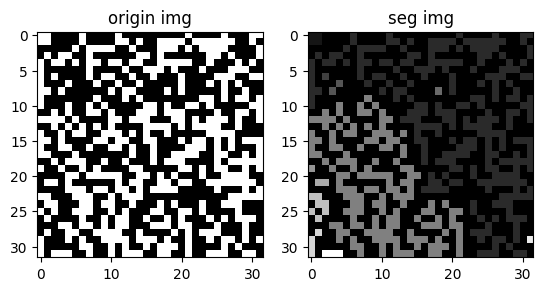

In [7]:
plt.subplot(1,2,1)
plt.title("origin img")
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title("seg img")
plt.imshow(img_seg,cmap='gray')

plt.show()

如果想要一次遍历就完成上色，而不是像课上的分割方法一样，先上一次色，再进行一次融合的话，按照我的思路是可行的， 只不过需要把递归用队列或者堆栈来实现。